<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [1]:

# Your code here
np.random.normal(loc=5, scale=2, size=10)

array([6.25478456, 5.68210428, 4.72345044, 8.15758646, 1.35850641,
       9.21939843, 1.4441093 , 3.49812448, 5.81620129, 6.25061171])

# loc is mean, scale is sd

### 1.2 Visualising the random numbers

Text(0, 0.5, 'Value of random number')

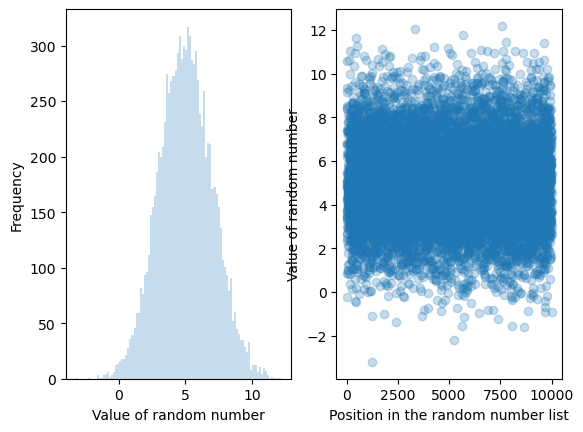

In [4]:

# Your code here
from matplotlib import pyplot as plt
n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.3 68%?

In [6]:

# Your code here
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 67.59%


## 1 Brownian Motion in 1D

### 1.1 The scenario

### 1.2 The simulation

In [19]:

# Your code here
import numpy.random as rnd
def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

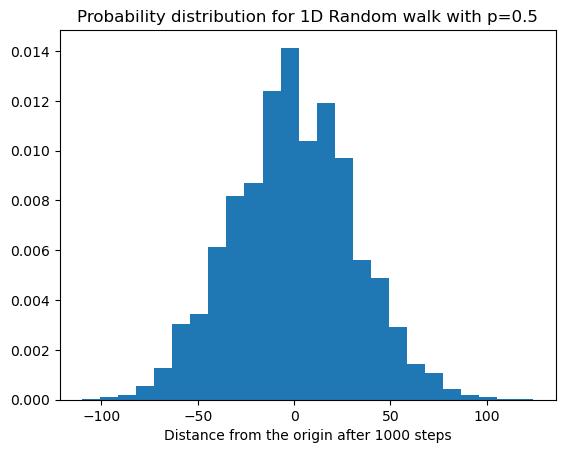

In [20]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.6')

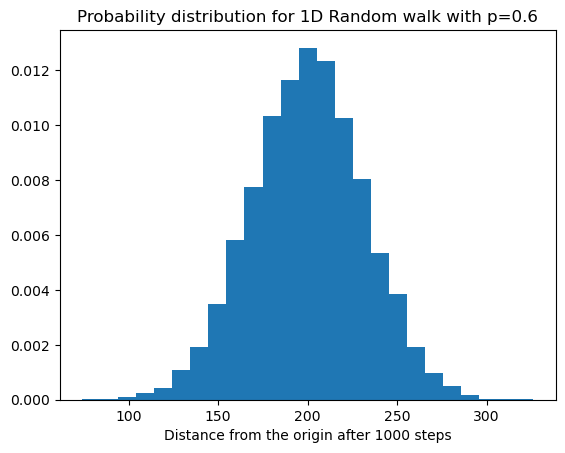

In [21]:
no_of_steps, p = 1_000, .6
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

### 1.3 What does theory say?

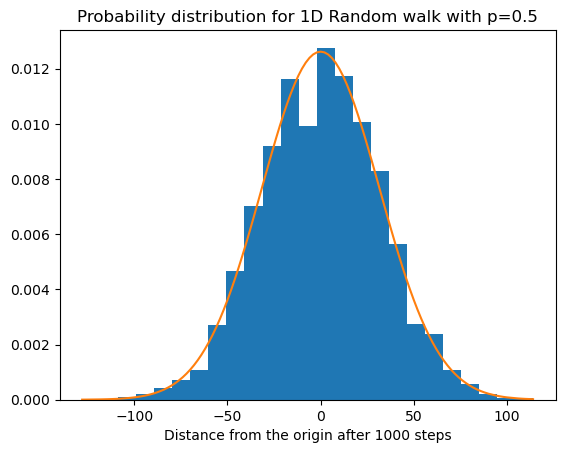

In [24]:

# Your code here
def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

prob_right = 0.5
prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')

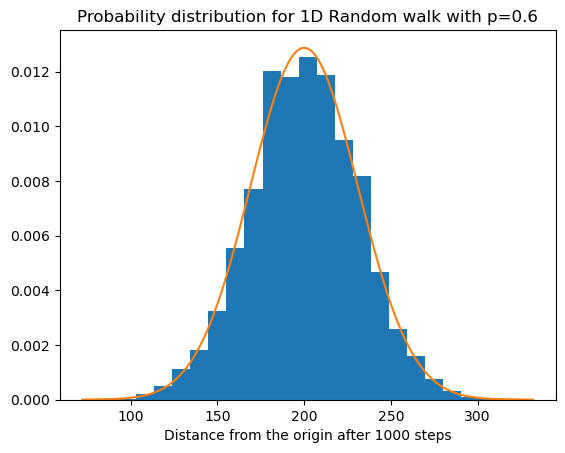

In [25]:

# Your code here
def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

no_of_steps, p = 1_000, .6
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

prob_right = 0.6
prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')

## 2 Estimating \(\pi\)

### 2.1 The method

### 2.2 A poor but intuitive solution

In [26]:

# Your code here
N_total = 100_000                             # Yes, Python allows the _
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)     
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi

3.13012

### 2.3 A better solution

In [28]:

# Your code here
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)                # Oh! the ease of NumPy!

4 * (N_green / N_total)

3.139696

### 2.4 A smarter solution

In [29]:

# Your code here
N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

3.14192

## Exercise 1 :  Vital Stats of Random π

In [284]:



# Your solution 
N_total = 10000
N_green = 0
repeat = 100
def estimate_pi(n):
    x = rnd.rand(n)
    y = rnd.rand(n)
    N_green = np.sum((x**2 + y**2) <= 1)
    return (4*N_green/n)

temp = [estimate_pi(N_total) for i in range(repeat)]
mean = np.mean(temp)
stdv = np.std(temp)



print(f' The mean of 100 repeats is {mean}')
print(f' The standard deviation of 100 repeats is {stdv}')


 The mean of 100 repeats is 3.142816
 The standard deviation of 100 repeats is 0.018842922915513923


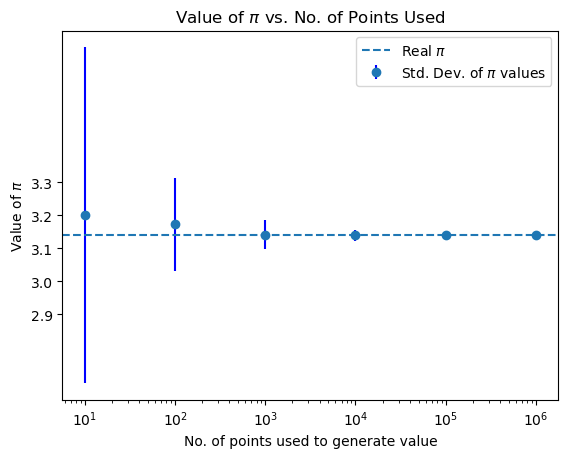

In [305]:
from matplotlib import pyplot as plt
from tqdm import tqdm


N_total = [10, 100, 1000,10000,100000,1000000]
N_green = 0
repeats = 100

def estimate_pi(n):
    x = rnd.rand(n)
    y = rnd.rand(n)
    N_green = np.sum((x**2 + y**2) <= 1)
    return (4*N_green/n)

mean = np.array([])
standard_deviation = np.array([])

for j in N_total:
    temp = [estimate_pi(j) for k in range(repeats)]
    mean = np.append(mean, np.mean(temp))
    standard_deviation = np.append(standard_deviation, np.std(temp))
    temp = np.array([])


x_values = np.array(N_total)
x_values_line = np.linspace(10, 100)
y_values_line = np.linspace(np.pi, np.pi)
plt.errorbar(x_values, mean, yerr = standard_deviation, xerr = None, fmt = 'o', ecolor = 'b', label = 'Std. Dev. of $\pi$ values')
plt.axhline(y= np.pi, label = 'Real $\pi$', ls = 'dashed')
plt.xscale('log')
plt.xlabel('No. of points used to generate value')
plt.ylabel('Value of $\pi$')
plt.legend()
plt.title('Value of $\pi$ vs. No. of Points Used')
plt.yticks([2.9, 3.0, 3.1, 3.2, 3.3], ['2.9', '3.0', '3.1', '3.2', '3.3'])
plt.show()


